# Day 16 -- Computer vision, NLP

In [6]:
# ! pip install opencv-python
import cv2
import matplotlib.pyplot as plt

In [48]:
image = cv2.imread('/Users/Ganesh/Desktop/SFJ/Data/puppy_dog.jpeg')

In [49]:
img = plt.imread('/Users/Ganesh/Desktop/SFJ/Data/puppy_dog.jpeg')

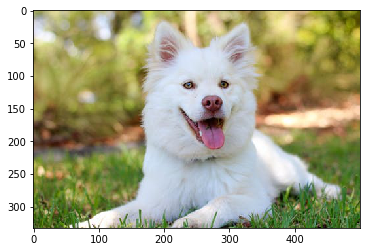

In [15]:
plt.imshow(img)
# RGB --> Red, Green, Blue

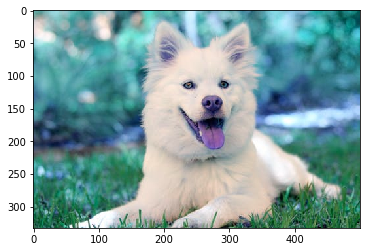

In [8]:
plt.imshow(image)

In [50]:
original_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

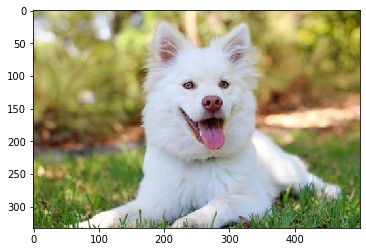

In [51]:
plt.imshow(original_img)

In [21]:
# Manipulating pixels
# arr[ rows, cols]

In [28]:
face = original_img[50:250, 160:350]

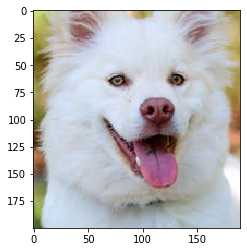

In [29]:
plt.imshow(face)

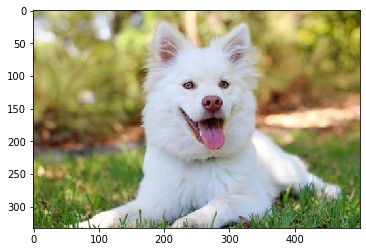

In [22]:
plt.imshow(original_img)

In [23]:
# b,g,r
(r,g,b) = original_img[0,0]

In [24]:
(r,g,b)

(181, 181, 119)

In [25]:
original_img[0,0] = (0,0,255)

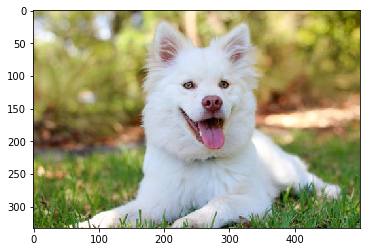

In [26]:
plt.imshow(original_img)

In [30]:
corner = original_img[50:100, 50:100]

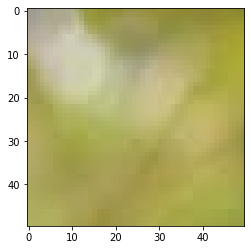

In [31]:
plt.imshow(corner)

In [52]:
original_img[60:200, 180:350] = (63,8,87)

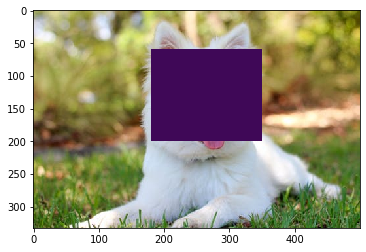

In [53]:
plt.imshow(original_img)

In [55]:
plt.imsave('/Users/Ganesh/Desktop/SFJ/Data/puppy_dog5.jpeg', original_img)

In [ ]:
import cv2
import numpy as np
canvas = np.zeros((300,300,3), dtype='uint8')
green = (0,255,0)
cv2.line(canvas, (0,0), (300,300), green, 5)
cv2.imshow('The canvas', canvas)
cv2.waitKey(0)
red = (0,0,255)
cv2.rectangle(canvas, (10,10), (70,70), green, 5)
cv2.imshow('The canvas', canvas)
cv2.waitKey(0)
new_col = (27,156,27)
cv2.rectangle(canvas, (90,90), (150,150), new_col, 3)
cv2.imshow('The canvas', canvas)
cv2.waitKey(0)
cv2.circle(canvas, (160,160), 20, new_col, 2)
cv2.imshow('The canvas', canvas)
cv2.waitKey(0)

In [ ]:
# drawing 20 circle randomly
import numpy as np
import cv2
canvas = np.zeros((300,300,3), dtype='uint8')
for i in range(25):
    radius = np.random.randint(10, high=80)
    color = np.random.randint(0, high=256, size=(3,)).tolist()
    point = np.random.randint(0, high=300, size=(2,))
    cv2.circle(canvas, tuple(point), radius, color, -1)
cv2.imshow('The canvas', canvas)
cv2.waitKey(0)

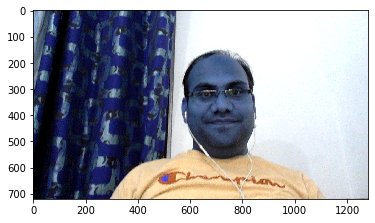

In [2]:
import cv2
import matplotlib.pyplot as plt
capture = cv2.VideoCapture(0)
ret, img = capture.read()
plt.imshow(img)

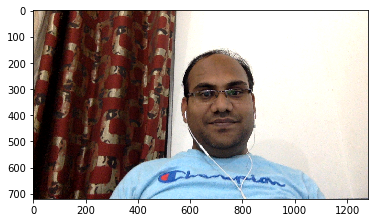

In [3]:
import cv2
import matplotlib.pyplot as plt
capture = cv2.VideoCapture('xyz.mp4') # default camera
ret, img = capture.read()
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [ ]:
# Directly streaming video from webcam
import cv2
import matplotlib.pyplot as plt
capture = cv2.VideoCapture(0)
width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('width:', width, 'hieght:', height)
while True:
    ret, frame = capture.read()
    greyscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', greyscale)
    
    if cv2.waitKey(1) & ord('q') == 0xFF:
        break
capture.release()
cv2.destroyAllWindows()

width: 1280 hieght: 720


In [1]:
# streaming video from webcam and writing to a file
import cv2
import matplotlib.pyplot as plt
capture = cv2.VideoCapture(0)
width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer = cv2.VideoWriter('/Users/Ganesh/Desktop/new_sample.mp4', cv2.VideoWriter_fourcc(*'XVID'), 20, (width, height))

while True:
    ret, frame = capture.read()
    # greyscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    writer.write(frame)
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()
writer.release()
cv2.destroyAllWindows()

In [2]:
# play the video from new_sample.mp4
import cv2
import time
capture = cv2.VideoCapture('/Users/Ganesh/Desktop/new_sample.mp4')

while capture.isOpened():
    ret, frame = capture.read()
    # greyscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    time.sleep(1/20)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()

error: OpenCV(4.1.1) /Users/travis/build/skvark/opencv-python/opencv/modules/highgui/src/window.cpp:352: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [2]:
import cv2
cascPath = '/Users/Ganesh/Desktop/SFJ/Data/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascPath)

capture = cv2.VideoCapture(0)

while True:
    ret, frame = capture.read() # capture frame-by-frame
    greyscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(greyscale, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))
    
    # draw a rectangle around the faces
    for (x,y,w,h) in faces:
        # print(x,y,w,h)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
    
    cv2.imshow('video', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()

475 71 334 334
471 77 320 320
827 456 49 49
760 510 86 86
461 79 322 322
778 513 64 64
454 77 328 328
778 512 64 64
739 522 54 54
464 79 321 321
740 523 52 52
464 80 315 315
479 86 307 307
487 85 307 307
491 88 308 308
486 82 313 313
487 84 309 309
497 84 300 300
483 78 310 310
477 79 311 311
485 86 307 307
481 86 315 315
482 85 318 318
732 526 88 88
476 79 328 328
480 86 315 315
731 530 88 88
485 85 310 310
484 81 314 314
487 82 308 308
487 83 309 309
484 82 307 307
463 82 306 306
432 87 309 309
555 99 313 313
518 94 307 307
481 99 301 301
809 452 54 54
574 104 312 312
581 97 320 320
412 89 324 324
614 167 267 267
720 149 310 310
825 168 331 331
651 142 307 307
1042 524 74 74
485 125 316 316
349 126 322 322
544 125 314 314
551 113 330 330


In [4]:
# ! pip install nltk
import nltk
import nltk.corpus
import os
os.listdir(nltk.data.find('corpora'))

['brown',
 'brown.zip',
 'gutenberg',
 'gutenberg.zip',
 'movie_reviews',
 'movie_reviews.zip',
 'stopwords',
 'stopwords.zip',
 'wordnet',
 'wordnet.zip']

In [5]:
nltk.download('knbc')

[nltk_data] Downloading package knbc to /Users/Ganesh/nltk_data...


True

In [6]:
os.listdir(nltk.data.find('corpora'))

['brown',
 'brown.zip',
 'gutenberg',
 'gutenberg.zip',
 'knbc.zip',
 'movie_reviews',
 'movie_reviews.zip',
 'stopwords',
 'stopwords.zip',
 'wordnet',
 'wordnet.zip']

In [ ]:
nltk.download()

In [8]:
from nltk.corpus import brown
len(brown.words())

1161192

In [11]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']